# 5. Access satellite imagery using Python

### Search a STAC catalog

In [1]:
from pystac_client import Client
from shapely.geometry import Point

api_url = "https://earth-search.aws.element84.com/v1" # Earth Search in the SpatioTemporal Asset Catalog

client = Client.open(api_url)

collection = "sentinel-2-l2a" # a Cloud Optimized GeoTIFF Raster

point = Point(4.89, 52.37) # AMS coordinates

search = client.search(
    collections = [collection],
    intersects = point,
    max_items = 10)

print(search.matched())

1180


In [2]:
items = search.item_collection()

print(len(items))

10


In [3]:
for item in items:
    print(item)

<Item id=S2A_31UFU_20240307_0_L2A>
<Item id=S2B_31UFU_20240305_0_L2A>
<Item id=S2B_31UFU_20240302_0_L2A>
<Item id=S2A_31UFU_20240229_0_L2A>
<Item id=S2A_31UFU_20240226_0_L2A>
<Item id=S2B_31UFU_20240224_0_L2A>
<Item id=S2B_31UFU_20240221_0_L2A>
<Item id=S2A_31UFU_20240219_0_L2A>
<Item id=S2A_31UFU_20240216_0_L2A>
<Item id=S2B_31UFU_20240214_0_L2A>


In [4]:
item = items[0]

print(item.datetime, "\n\n", item.geometry, "\n\n", item.properties)

2024-03-07 10:46:26.253000+00:00 

 {'type': 'Polygon', 'coordinates': [[[5.226559456561662, 53.22881917036867], [4.802698513028401, 52.248790995179895], [6.071664488869862, 52.22257539160585], [6.141754296879459, 53.20819279121764], [5.226559456561662, 53.22881917036867]]]} 

 {'created': '2024-03-07T17:09:17.394Z', 'platform': 'sentinel-2a', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 31.148699, 'proj:epsg': 32631, 'mgrs:utm_zone': 31, 'mgrs:latitude_band': 'U', 'mgrs:grid_square': 'FU', 'grid:code': 'MGRS-31UFU', 'view:sun_azimuth': 161.58646946027, 'view:sun_elevation': 30.7359104725465, 's2:degraded_msi_data_percentage': 0.0168, 's2:nodata_pixel_percentage': 32.582241, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0, 's2:cloud_shadow_percentage': 7.674173, 's2:vegetation_percentage': 14.040025, 's2:not_vegetated_percentage': 12.890007, 's2:water_percentage': 27.86065, 's2:unclassified_percentage': 6.384715, 's2:medium_pro

POINT (4.89 52.37)


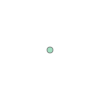

In [5]:
print(point)
point

### Exercise: Search satellite scenes using metadata filters



Search for all the available Sentinel-2 scenes in the sentinel-2-l2a collection that satisfy the following criteria: - intersect a provided bounding box (use ±0.01 deg in lat/lon from the previously defined point); - have been recorded between 20 March 2020 and 30 March 2020; - have a cloud coverage smaller than 10% (hint: use the query input argument of client.search).

How many scenes are available? Save the search results in GeoJSON format.

In [6]:
bounding_box = point.buffer(0.01).bounds
bounding_box

(4.88, 52.36, 4.8999999999999995, 52.379999999999995)

TAB, SHIFT+TAB to find client.search() documentation

Find arguments to the query parameter of client.search() in the _API documentation_

https://earth-search.aws.element84.com/v1/api.html#tag/Features/operation/getFeatures

In [7]:
search = client.search(
    collections = [collection],
    bbox = bounding_box,
    datetime = ['2020-03-20', '2020-03-30'],
    query = ["eo:cloud_cover<15"]
)
print(search.matched())

6


In [8]:
items = search.item_collection()
items.save_object("../data/search.json")

### Access the assets

In [9]:
items[0]

<Item id=S2A_31UFU_20200328_1_L2A>

In [10]:
assets = items[0].assets
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [11]:
print(assets["aot"].title)

Aerosol optical thickness (AOT)


In [12]:
# use tuple to inspect json 
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

aot: Aerosol optical thickness (AOT)
blue: Blue (band 2) - 10m
coastal: Coastal aerosol (band 1) - 60m
granule_metadata: None
green: Green (band 3) - 10m
nir: NIR 1 (band 8) - 10m
nir08: NIR 2 (band 8A) - 20m
nir09: NIR 3 (band 9) - 60m
red: Red (band 4) - 10m
rededge1: Red edge 1 (band 5) - 20m
rededge2: Red edge 2 (band 6) - 20m
rededge3: Red edge 3 (band 7) - 20m
scl: Scene classification map (SCL)
swir16: SWIR 1 (band 11) - 20m
swir22: SWIR 2 (band 12) - 20m
thumbnail: Thumbnail image
tileinfo_metadata: None
visual: True color image
wvp: Water vapour (WVP)
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue (band 2) - 10m
coastal-jp2: Coastal aerosol (band 1) - 60m
green-jp2: Green (band 3) - 10m
nir-jp2: NIR 1 (band 8) - 10m
nir08-jp2: NIR 2 (band 8A) - 20m
nir09-jp2: NIR 3 (band 9) - 60m
red-jp2: Red (band 4) - 10m
rededge1-jp2: Red edge 1 (band 5) - 20m
rededge2-jp2: Red edge 2 (band 6) - 20m
rededge3-jp2: Red edge 3 (band 7) - 20m
scl-jp2: Scene classification map (SCL)
swi

Confirming that the raster contains one data file per optical band e.g. blue green red

In [13]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg


In [14]:
!wget https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg --directory-prefix=/app/data/

--2024-03-08 08:37:11--  https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg
Resolving sentinel-cogs.s3.us-west-2.amazonaws.com (sentinel-cogs.s3.us-west-2.amazonaws.com)... ::ffff:52.92.190.162, ::ffff:52.92.204.10, ::ffff:3.5.81.156, ...
Connecting to sentinel-cogs.s3.us-west-2.amazonaws.com (sentinel-cogs.s3.us-west-2.amazonaws.com)|::ffff:52.92.190.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92428 (90K) [image/jpeg]
Saving to: ‘/app/data/thumbnail.jpg.2’

thumbnail.jpg.2     100%[===================>]  90.26K   219KB/s    in 0.4s    

2024-03-08 08:37:12 (219 KB/s) - ‘/app/data/thumbnail.jpg.2’ saved [92428/92428]



Thumbnail in markdown

![Thumbnail](https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg)

In [15]:
import rioxarray
nir_href = assets["nir"].href
nir = rioxarray.open_rasterio(nir_href)

In [16]:
print(nir)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 88kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [17]:
nir.rio.to_raster('../data/nir.tif')
nir[0,1500:2200,1500:2200].rio.to_raster('../data/nir_subset.tif')

### Exercise: Downloading Landsat 8 Assets

In this exercise we put in practice all the skills we have learned in this episode to retrieve images from a different mission: [Landsat 8](https://www.usgs.gov/landsat-missions/landsat-8). In particular, we browse images from the [Harmonized Landsat Sentinel-2 (HLS) project](https://lpdaac.usgs.gov/products/hlsl30v002/), which provides images from NASA’s Landsat 8 and ESA’s Sentinel-2 that have been made consistent with each other. The HLS catalog is indexed in the NASA Common Metadata Repository (CMR) and it can be accessed from the STAC API endpoint at the following URL: https://cmr.earthdata.nasa.gov/stac/LPCLOUD.

 - Using pystac_client, search for all assets of the Landsat 8 collection (HLSL30.v2.0) from February to March 2021, intersecting the point with longitude/latitute coordinates (-73.97, 40.78) deg.
- Visualize an item’s thumbnail (asset key browse).

In [18]:
client = Client.open("https://cmr.earthdata.nasa.gov/stac/LPCLOUD")

search = client.search(
    collections = 'HLSL30.v2.0',
    datetime = ['2021-02','2021-03'],
    intersects = Point(-73.97, 40.78)
)

print(search.matched())

5


In [19]:
items = search.item_collection()
items[0]
items[0].assets['browse'].href

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'

Thumbnail in markdown

![Thumbnail](https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg)

In [20]:
print(items[0].assets["browse"].href)

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg


### clean space

In [ ]:
del api_url, client, collection, point, search, nir, nir_href, asset, assets, bounding_box

# 6. Read and visualize raster data

### Load a Raster and view attributes

In [21]:
import pystac

items = pystac.ItemCollection.from_file("../data/geospatial-python-raster-dataset/search.json")

items[0] # Sentinel-2 scenes March 28th 2020

items[0].assets # look for nir09

# invalid data dependency -> shift to own search json
items = pystac.ItemCollection.from_file("../data/search.json")

items[0].assets # BINGO!

{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/AOT.tif>,
 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B02.tif>,
 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B01.tif>,
 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/granule_metadata.xml>,
 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B03.tif>,
 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B08.tif>,
 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1

In [22]:
import rioxarray

raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href) # raster Amsterdam Band 9

raster_ams_b9 # look for central wavelength 945 nm https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/msi-instrument

# one band, 1830 rows and 1830 cols
# 3348900 pixels of type unsigned integer16


<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 7MB
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [23]:
# ALT+LEFT-CLICK-and-DRAG  https://medium.com/@shouke.wei/how-to-use-the-multiline-cursor-in-the-jupyter-notebook-fd0a21493542
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.bounds())
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

0
EPSG:32631
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


### Visualize a Raster

In [24]:
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

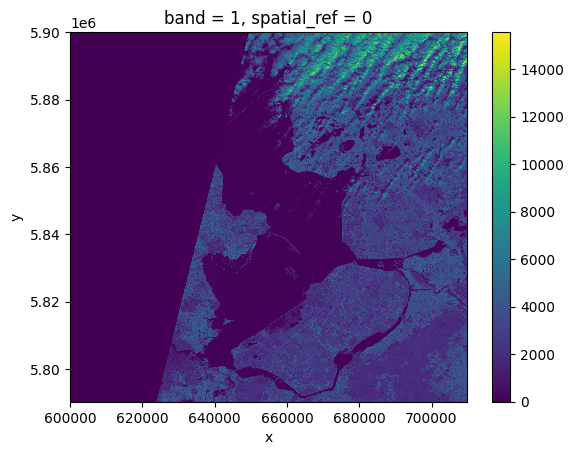

In [25]:
raster_ams_b9.plot() # easy plot of raster with coordinates

# cloudy pixels at the top have high reflectance values, telling of the fact that the wavelength 945nm is sensitive to water vapor.
# band = 1 refers to the ordering of all the bands in the DataArray.
# half the image is blank.

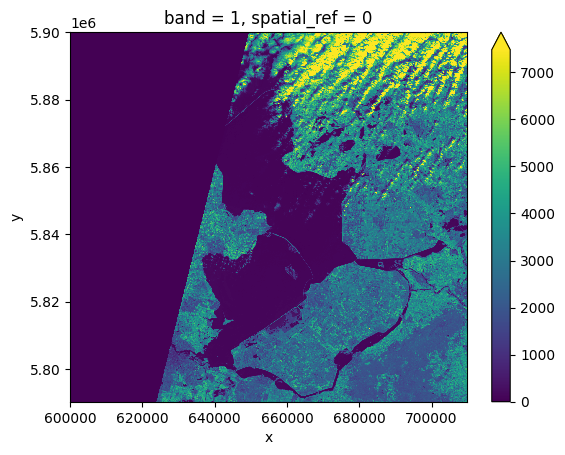

In [26]:
raster_ams_b9.plot(robust = True) # displays values betwen the 2nd and 98th percentiles.

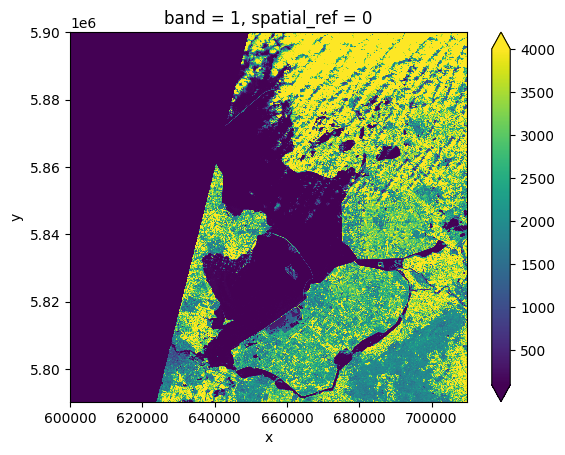

In [27]:
raster_ams_b9.plot(vmin = 100, vmax = 4000) # manuel set

### View Raster Coordinate Reference System CRS

In [28]:
print(raster_ams_b9.rio.crs.to_epsg()) # succinctly representing a particular CRS

32631


In [29]:
from pyproj import CRS

espg = raster_ams_b9.rio.crs.to_epsg()

crs = CRS(espg)

crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

#### Exercise: Find the access units of the CRS

Look for a method

In [31]:
dir(crs)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [32]:
help(crs)

Help on CRS in module pyproj.crs.crs object:

class CRS(builtins.object)
 |  CRS(projparams: Optional[Any] = None, **kwargs) -> None
 |  
 |  A pythonic Coordinate Reference System manager.
 |  
 |  .. versionadded:: 2.0.0
 |  
 |  See: :c:func:`proj_create`
 |  
 |  The functionality is based on other fantastic projects:
 |  
 |  * `rasterio <https://github.com/mapbox/rasterio/blob/c13f0943b95c0eaa36ff3f620bd91107aa67b381/rasterio/_crs.pyx>`_  # noqa: E501
 |  * `opendatacube <https://github.com/opendatacube/datacube-core/blob/83bae20d2a2469a6417097168fd4ede37fd2abe5/datacube/utils/geometry/_base.py>`_  # noqa: E501
 |  
 |  Attributes
 |  ----------
 |  srs: str
 |      The string form of the user input used to create the CRS.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Any) -> bool
 |      Return self==value.
 |  
 |  __getstate__(self) -> dict[str, str]
 |  
 |  __hash__(self) -> int
 |      Return hash(self).
 |  
 |  __init__(self, projparams: Optional[Any] = None

In [33]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

__Answer__
- two axis'
- units are meters

### Understanding pyproj CRS Summary

In [34]:
# revisit the CRS summary
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Each UTM zone has 6 degrees of longitudein width.
There are 60 zones in UTM.

### Calucate raster statistics

In [35]:
print('min: \n',raster_ams_b9.min(), '\n')
print('max: \n',raster_ams_b9.max(), '\n')
print('mean: \n',raster_ams_b9.mean(), '\n')
print('std: \n',raster_ams_b9.std(), '\n')

min: 
 <xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0 

max: 
 <xarray.DataArray ()> Size: 2B
array(15558, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0 

mean: 
 <xarray.DataArray ()> Size: 8B
array(1649.83763385)
Coordinates:
    spatial_ref  int64 8B 0 

std: 
 <xarray.DataArray ()> Size: 8B
array(2053.77598092)
Coordinates:
    spatial_ref  int64 8B 0 



In [36]:
print('25th - 75th percentiles: \n', raster_ams_b9.quantile([0.25, 0.75]), '\n')

25th - 75th percentiles: 
 <xarray.DataArray (quantile: 2)> Size: 16B
array([   0., 2919.])
Coordinates:
  * quantile  (quantile) float64 16B 0.25 0.75 



In [37]:
import numpy as np

print(np.percentile(raster_ams_b9, 25))
print(np.percentile(raster_ams_b9, 75))

0.0
2919.0


In [38]:
help(raster_ams_b9.quantile)

Help on method quantile in module xarray.core.dataarray:

quantile(q: 'ArrayLike', dim: 'Dims' = None, *, method: 'QuantileMethods' = 'linear', keep_attrs: 'bool | None' = None, skipna: 'bool | None' = None, interpolation: 'QuantileMethods | None' = None) -> 'Self' method of xarray.core.dataarray.DataArray instance
    Compute the qth quantile of the data along the specified dimension.
    
    Returns the qth quantiles(s) of the array elements.
    
    Parameters
    ----------
    q : float or array-like of float
        Quantile to compute, which must be between 0 and 1 inclusive.
    dim : str or Iterable of Hashable, optional
        Dimension(s) over which to apply quantile.
    method : str, default: "linear"
        This optional parameter specifies the interpolation method to use when the
        desired quantile lies between two data points. The options sorted by their R
        type as summarized in the H&F paper [1]_ are:
    
            1. "inverted_cdf"
            2. "

### Dealing with missing data

Finding 0 in the 25th percentile and the satellite photo being blank on the left-hand side indicate missing values, which is common in raster, particularly imported with `rioxarray`. A common reason for missing values is that the sensor collecting the data flew over only some part of a defined region.

We can recode them as NaN using the bolean mask stored in the object.

In [39]:
print(raster_ams_b9.rio.nodata) # recall

0


In [40]:
# masked=True
rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 13MB
[3348900 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [41]:
# where nodata
raster_ams_b9.where(raster_ams_b9!=raster_ams_b9.rio.nodata)

<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 13MB
array([[[   nan,    nan,    nan, ..., 10061., 10200., 10172.],
        [   nan,    nan,    nan, ..., 10424., 10315.,  9763.],
        [   nan,    nan,    nan, ..., 10328., 10648., 10405.],
        ...,
        [   nan,    nan,    nan, ...,  4298.,  4343.,  4315.],
        [   nan,    nan,    nan, ...,  4284.,  4284.,  4155.],
        [   nan,    nan,    nan, ...,  3935.,  3545.,  3958.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [42]:
raster_ams_b9_v2 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

print('setting missing to 0 :\n', raster_ams_b9.min().values.item(),'\n')

print('setting missing to NaN :\n', raster_ams_b9_v2.min().values.item(),'\n')

setting missing to 0 :
 0 

setting missing to NaN :
 1.0 



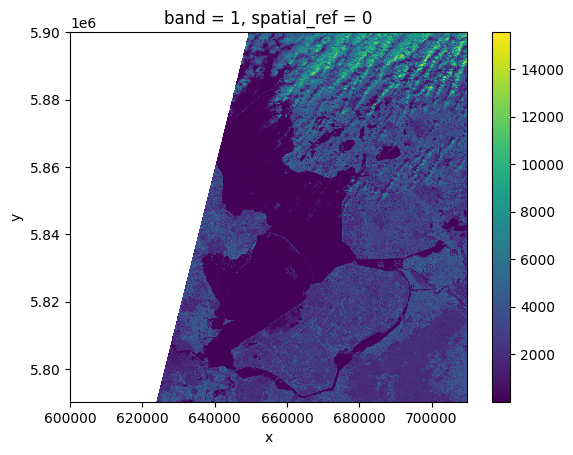

In [43]:
raster_ams_b9_v2.plot() # notice that instead of dark the missing data is now white

### Raster bands

In [46]:
items[0].assets['visual']

<Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/TCI.tif>

In [55]:
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level = 3)
raster_ams_overview

<xarray.DataArray (band: 3, y: 687, x: 687)> Size: 1MB
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 5kB 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

__Notice__

- the xarray contains multiple dimension--band, x, y--not just two like Pandas dataframes!
- the band dimension includes three bands

In [86]:
raster_ams_overview.shape # three dimensions of different sizes! The x and y axis are balanced!

(3, 687, 687)

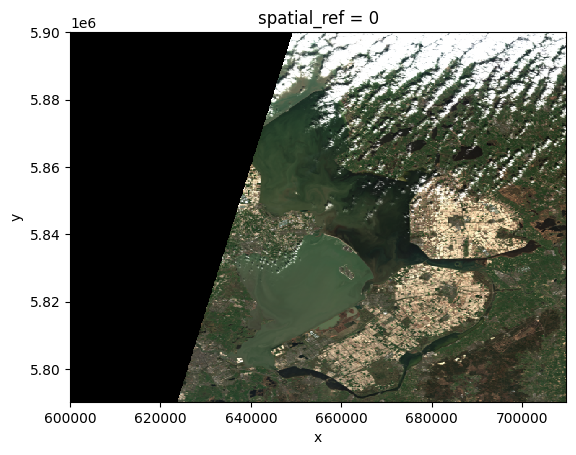

In [58]:
raster_ams_overview.plot.imshow()

`imshow()`
- assumes that three channels represent RGB color
- strecthes the proportions 

### Exercise: Set the plotting aspect ratio

Use the documentation to set the correct aspect ratio

https://docs.xarray.dev/en/stable/generated/xarray.DataArray.plot.imshow.html

In [67]:
# help(raster_ams_overview.plot.imshow())

help(raster_ams_overview.plot.imshow)

# size : scalar of height size
# aspect : auto, equal or scalar (scalar * size)

Help on method imshow in module xarray.plot.accessor:

imshow(*args: 'Any', x: 'Hashable | None' = None, y: 'Hashable | None' = None, figsize: 'Iterable[float] | None' = None, size: 'float | None' = None, aspect: 'float | None' = None, ax: 'Axes | None' = None, row: 'Hashable | None' = None, col: 'Hashable | None' = None, col_wrap: 'int | None' = None, xincrease: 'bool | None' = True, yincrease: 'bool | None' = True, add_colorbar: 'bool | None' = None, add_labels: 'bool' = True, vmin: 'float | None' = None, vmax: 'float | None' = None, cmap: 'str | Colormap | None' = None, center: 'float | Literal[False] | None' = None, robust: 'bool' = False, extend: 'ExtendOptions' = None, levels: 'ArrayLike | None' = None, infer_intervals=None, colors: 'str | ArrayLike | None' = None, subplot_kws: 'dict[str, Any] | None' = None, cbar_ax: 'Axes | None' = None, cbar_kwargs: 'dict[str, Any] | None' = None, xscale: 'ScaleOptions' = None, yscale: 'ScaleOptions' = None, xticks: 'ArrayLike | None' = None, 

In [82]:
raster_ams_overview.plot.imshow(aspect='equal') # BUG !!

ValueError: plt.imshow's `aspect` kwarg is not available in xarray

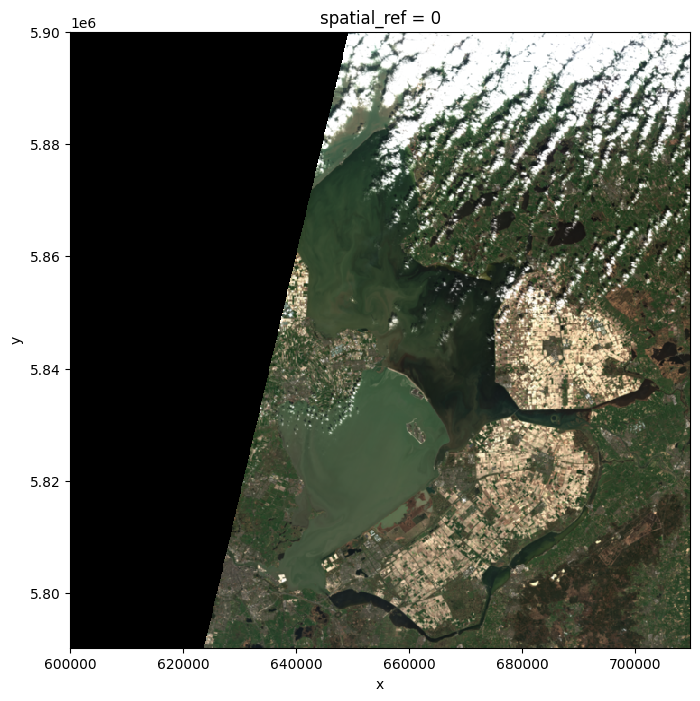

In [85]:
raster_ams_overview.plot.imshow(size = 8, aspect = 1)


### clean space

In [110]:
del raster_ams_b9, raster_ams_b9_v2, raster_ams_overview, item, items, 

# 7 Vector data (.zip and .gpkg in app/data/)

### Import Vector datasets

In [87]:
import geopandas as gpd

In [90]:
geodf = gpd.read_file('../data/brpgewaspercelen_definitief_2020_small.gpkg')
geodf # dataframe of crop field parcels

category                                         gewas  gewascode  \
0      Grasland                            Grasland, blijvend        265   
1      Grasland                            Grasland, blijvend        265   
2      Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
3      Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
4      Grasland                            Grasland, blijvend        265   
...         ...                                           ...        ...   
22026  Grasland                            Grasland, blijvend        265   
22027  Grasland                            Grasland, blijvend        265   
22028  Grasland                            Grasland, blijvend        265   
22029  Bouwland                                   Maïs, snij-        259   
22030  Grasland                            Grasland, blijvend        265   

       jaar      status                                           geometry  
0      2020  Definitief  POLYGON ((117626.809 505287.535, 117622.930 50...  
1      2020  Definitief  POLYGON ((117744.449 504313.788, 117746.064 50...  
2      2020  Definitief  POLYGON ((117784.216 503525.695, 117789.021 50...  
3      2020  Definitief  POLYGON ((117903.681 504159.929, 117908.257 50...  
4      2020  Definitief  POLYGON ((118150.139 505369.637, 118168.010 50...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((139366.829 479190.018, 139391.354 47...  
22027  2020  Definitief  POLYGON ((138750.889 478528.117, 138722.478 47...  
22028  2020  Definitief  POLYGON ((139214.523 479446.287, 139104.402 47...  
22029  2020  Definitief  POLYGON ((140196.363 479281.898, 140195.206 47...  
22030  2020  Definitief  POLYGON ((139946.076 479297.442, 139941.657 47...  

[22031 rows x 6 columns]

### Subset geodf on _geometry_ dimension

In [91]:
# define bounding box

xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, xmax, ymin, ymax)
bbox

(110000, 140000, 470000, 510000)

In [92]:
geodf_bb = gpd.read_file('../data/brpgewaspercelen_definitief_2020_small.gpkg', bbox = bbox)
geodf_bb

category                                         gewas  gewascode  \
0      Bouwland                                 Gerst, zomer-        236   
1      Bouwland                                   Maïs, snij-        259   
2      Grasland                            Grasland, blijvend        265   
3      Grasland                            Grasland, blijvend        265   
4      Grasland                            Grasland, blijvend        265   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
0      2020  Definitief  POLYGON ((112701.927 469461.513, 112742.745 46...  
1      2020  Definitief  POLYGON ((112894.273 469539.714, 112899.962 46...  
2      2020  Definitief  POLYGON ((112714.585 469792.879, 112746.317 46...  
3      2020  Definitief  POLYGON ((112477.552 469951.205, 112496.172 46...  
4      2020  Definitief  POLYGON ((112384.744 469953.238, 112405.630 46...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((133371.140 492631.152, 133379.924 49...  
22027  2020  Definitief  POLYGON ((133422.246 492887.057, 133426.347 49...  
22028  2020  Definitief  POLYGON ((133554.659 492738.186, 133587.600 49...  
22029  2020  Definitief  POLYGON ((133434.981 492748.790, 133481.442 49...  
22030  2020  Definitief  POLYGON ((133361.772 492537.069, 133367.624 49...  

[22031 rows x 6 columns]

- _Notice the change in the POLOGONs_
- The geometry column is represented by a `shapely.geometry.Polygon`

<Axes: >

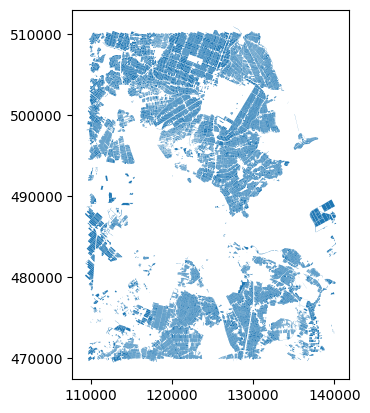

In [94]:
geodf_bb.plot()

### Vector Metadata & Attributes

In [97]:
geodf_bb.type # geometry type

0        Polygon
1        Polygon
2        Polygon
3        Polygon
4        Polygon
          ...   
22026    Polygon
22027    Polygon
22028    Polygon
22029    Polygon
22030    Polygon
Length: 22031, dtype: object

In [98]:
geodf_bb.crs # Coordinate Reference System

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

- The CRS "RD New" specifies the units of the 'extent' values, which makes this critical to interpretation!

In [99]:
geodf_bb.total_bounds # extent - geographic area covered

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

- minx, miny, maxx, maxy

In [100]:
bbox

(110000, 140000, 470000, 510000)

- xmin, xmax, ymin, ymax

- Notice the different rankorder of the min/max values of x and y in total_bounds and our bbox, respectively:
  - The empirical min values are smaller than the set min criteria.
    - 110000 > 109222
    - 470000 > 469461
  - The empirical max values are larger than the set max criteria.
    - 140000 < 140295
    - 510000 < 510939

### Further crop the dataset

In [102]:
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)
geodf_bb2 = geodf_bb.cx[xmin:xmax, ymin:ymax]
geodf_bb2

category                                         gewas  gewascode  \
870    Grasland                            Grasland, blijvend        265   
871    Grasland                            Grasland, blijvend        265   
872    Grasland                            Grasland, blijvend        265   
873    Grasland                            Grasland, blijvend        265   
874    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
870    2020  Definitief  POLYGON ((120154.932 495930.341, 120159.250 49...  
871    2020  Definitief  POLYGON ((120101.483 496378.781, 120102.674 49...  
872    2020  Definitief  POLYGON ((119858.185 496057.345, 119859.714 49...  
873    2020  Definitief  POLYGON ((120168.354 496651.174, 120168.535 49...  
874    2020  Definitief  POLYGON ((119944.018 496061.229, 119949.971 49...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((133371.140 492631.152, 133379.924 49...  
22027  2020  Definitief  POLYGON ((133422.246 492887.057, 133426.347 49...  
22028  2020  Definitief  POLYGON ((133554.659 492738.186, 133587.600 49...  
22029  2020  Definitief  POLYGON ((133434.981 492748.790, 133481.442 49...  
22030  2020  Definitief  POLYGON ((133361.772 492537.069, 133367.624 49...  

[4872 rows x 6 columns]

### Export to file

In [103]:
geodf_bb2.to_file('../data/geodf_bb2.shp')

Note that this actually writes multiple files to disk (fields_cropped.cpg, fields_cropped.dbf, fields_cropped.prj, fields_cropped.shp, fields_cropped.shx). All these files should ideally be present in order to re-read the dataset later, although only the .shp, .shx, and .dbf files are mandatory

### Selecting spatial features

In [104]:
# geodf_bb2 = gpd.read_file('../data/geodf_bb2.shp') # already in memory
fields = geodf_bb2
wells = gpd.read_file('../data/brogmwvolledigeset.zip')

In [106]:
fields

category                                         gewas  gewascode  \
870    Grasland                            Grasland, blijvend        265   
871    Grasland                            Grasland, blijvend        265   
872    Grasland                            Grasland, blijvend        265   
873    Grasland                            Grasland, blijvend        265   
874    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
870    2020  Definitief  POLYGON ((120154.932 495930.341, 120159.250 49...  
871    2020  Definitief  POLYGON ((120101.483 496378.781, 120102.674 49...  
872    2020  Definitief  POLYGON ((119858.185 496057.345, 119859.714 49...  
873    2020  Definitief  POLYGON ((120168.354 496651.174, 120168.535 49...  
874    2020  Definitief  POLYGON ((119944.018 496061.229, 119949.971 49...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((133371.140 492631.152, 133379.924 49...  
22027  2020  Definitief  POLYGON ((133422.246 492887.057, 133426.347 49...  
22028  2020  Definitief  POLYGON ((133554.659 492738.186, 133587.600 49...  
22029  2020  Definitief  POLYGON ((133434.981 492748.790, 133481.442 49...  
22030  2020  Definitief  POLYGON ((133361.772 492537.069, 133367.624 49...  

[4872 rows x 6 columns]

In [107]:
wells

bro_id delivery_accountable_party quality_regime  \
0      GMW000000003627                   01182779        IMBRO/A   
1      GMW000000003637                   01182779        IMBRO/A   
2      GMW000000003647                   01182779        IMBRO/A   
3      GMW000000003657                   01182779        IMBRO/A   
4      GMW000000003667                   01182779        IMBRO/A   
...                ...                        ...            ...   
54654  GMW000000061413                   50788590          IMBRO   
54655  GMW000000061414                   50788590          IMBRO   
54656  GMW000000061415                   50788590          IMBRO   
54657  GMW000000061416                   09220971          IMBRO   
54658  GMW000000061417                   09220971          IMBRO   

      with_prehistory   delivery_context construction_standard  \
0                  ja  archiefoverdracht              onbekend   
1                  ja  archiefoverdracht              onbekend   
2                  ja  archiefoverdracht              onbekend   
3                  ja  archiefoverdracht              onbekend   
4                  ja  archiefoverdracht              onbekend   
...               ...                ...                   ...   
54654             nee                 WW             STOWAgwst   
54655             nee                 WW             STOWAgwst   
54656             nee                 WW             STOWAgwst   
54657             nee       publiekeTaak                  geen   
54658             nee       publiekeTaak                  geen   

      initial_function removed  number_of_monitoring_tubes groundlevel_stable  \
0                stand     nee                         1.0           onbekend   
1                stand     nee                         1.0           onbekend   
2                stand     nee                         1.0           onbekend   
3                stand     nee                         2.0           onbekend   
4                stand     nee                         1.0           onbekend   
...                ...     ...                         ...                ...   
54654            stand     nee                         1.0                 ja   
54655            stand     nee                         1.0                 ja   
54656            stand     nee                         1.0                 ja   
54657            stand     nee                         1.0                 ja   
54658            stand     nee                         1.0                 ja   

       ... corrected latest_correction_time under_review under_review_time  \
0      ...       nee                   None          nee              None   
1      ...       nee                   None          nee              None   
2      ...       nee                   None          nee              None   
3      ...       nee                   None          nee              None   
4      ...       nee                   None          nee              None   
...    ...       ...                    ...          ...               ...   
54654  ...       nee                   None          nee              None   
54655  ...       nee                   None          nee              None   
54656  ...       nee                   None          nee              None   
54657  ...       nee                   None          nee              None   
54658  ...       nee                   None          nee              None   

      deregistered deregistration_time reregistered reregistration_time  \
0              nee                None          nee                None   
1              nee                None          nee                None   
2              nee                None          nee                None   
3              nee                None          nee                None   
4              nee                None          nee                None   
...            ...                 ...        

In [108]:
del geodf_bb2, geodf_bb, geodf

In [120]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<Axes: >

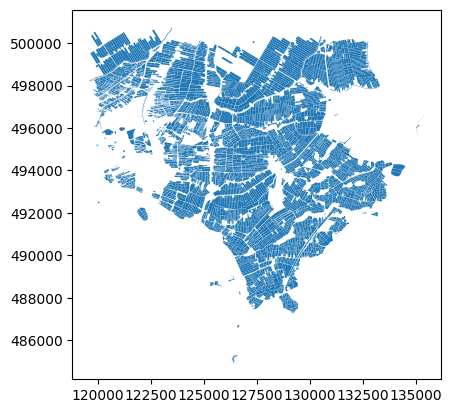

In [119]:
fields.plot()

<Axes: >

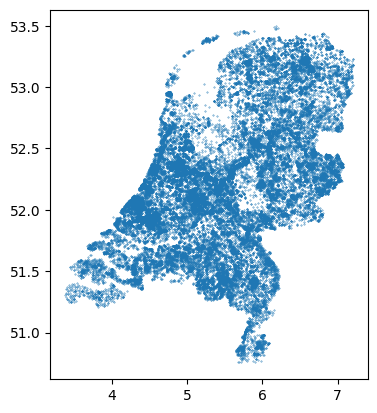

In [113]:
wells.plot(markersize = 0.1)

<Axes: >

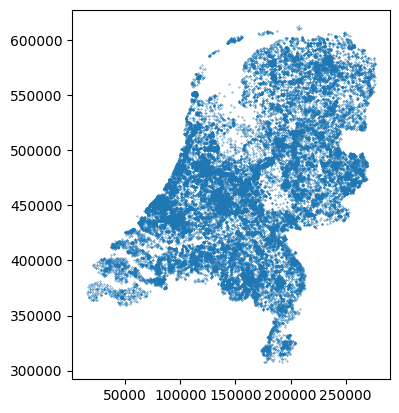

In [114]:
wells = wells.to_crs(epsg = 28992) # transfer points from lat/lon to CRS noted above
wells.plot(markersize = 0.1)

In [116]:
wells_clip = wells.clip(fields) # select wells within fields
wells_clip

bro_id delivery_accountable_party quality_regime  \
19445  GMW000000024992                   50200097        IMBRO/A   
40174  GMW000000043963                   27364178        IMBRO/A   
40261  GMW000000043771                   27364178        IMBRO/A   
40150  GMW000000043753                   27364178        IMBRO/A   
40032  GMW000000045203                   27364178        IMBRO/A   
...                ...                        ...            ...   
38624  GMW000000045994                   27364178        IMBRO/A   
39248  GMW000000044430                   27364178        IMBRO/A   
40422  GMW000000044026                   27364178        IMBRO/A   
38779  GMW000000045404                   27364178        IMBRO/A   
16926  GMW000000025310                   50200097        IMBRO/A   

      with_prehistory   delivery_context construction_standard  \
19445              ja  archiefoverdracht              onbekend   
40174              ja  archiefoverdracht              onbekend   
40261              ja  archiefoverdracht              onbekend   
40150              ja  archiefoverdracht              onbekend   
40032              ja  archiefoverdracht              onbekend   
...               ...                ...                   ...   
38624              ja  archiefoverdracht              onbekend   
39248              ja  archiefoverdracht              onbekend   
40422              ja  archiefoverdracht              onbekend   
38779              ja  archiefoverdracht              onbekend   
16926              ja  archiefoverdracht              onbekend   

      initial_function removed  number_of_monitoring_tubes groundlevel_stable  \
19445            stand     nee                         1.0                 ja   
40174            stand     nee                         1.0                nee   
40261            stand      ja                         1.0                nee   
40150            stand      ja                         1.0                nee   
40032            stand      ja                         1.0                nee   
...                ...     ...                         ...                ...   
38624            stand      ja                         1.0                nee   
39248            stand      ja                         1.0                nee   
40422            stand      ja                         1.0                 ja   
38779            stand     nee                         1.0                 ja   
16926            stand     nee                         1.0                 ja   

       ... corrected latest_correction_time under_review under_review_time  \
19445  ...       nee                   None          nee              None   
40174  ...       nee                   None          nee              None   
40261  ...       nee                   None          nee              None   
40150  ...       nee                   None          nee              None   
40032  ...       nee                   None          nee              None   
...    ...       ...                    ...          ...               ...   
38624  ...       nee                   None          nee              None   
39248  ...       nee                   None          nee              None   
40422  ...       nee                   None          nee              None   
38779  ...       nee                   None          nee              None   
16926  ...       nee                   None          nee              None   

      deregistered deregistration_time reregistered reregistration_time  \
19445          nee                None          nee                None   
40174          nee                None          nee                None   
40261          nee                None          nee                None   
40150          nee                None          nee                None   
40032          nee                None          nee                None   
...            ...                 ...        

<Axes: >

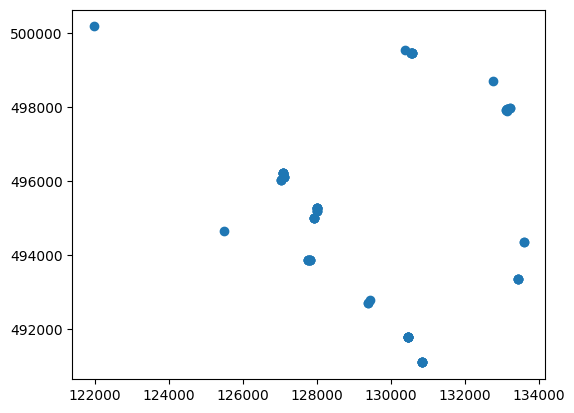

In [117]:
wells_clip.plot()

- clearly this selection is very precise
- we want more wells in the periphery of the fields


<Axes: >

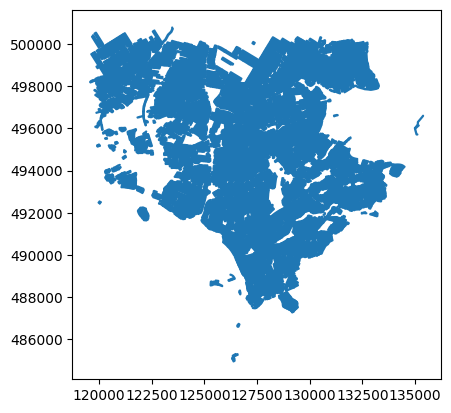

In [118]:
buffer = fields.buffer(50) # 50m buffer zone
fields_buffer = fields.copy()
fields_buffer['geometry'] = buffer # subsets the fields in buffer zone
fields_buffer.plot()

In [122]:
fields_buffer_dissolve = fields_buffer.dissolve() # dissolve into one multi-polygon
fields_buffer_dissolve

geometry  category  \
0  MULTIPOLYGON (((120037.937 492388.957, 120033....  Grasland   

                gewas  gewascode  jaar      status  
0  Grasland, blijvend        265  2020  Definitief

<Axes: >

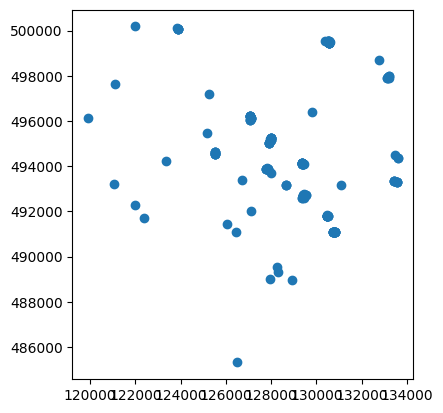

In [123]:
wells_clip_buffer = wells.clip(fields_buffer_dissolve)
wells_clip_buffer.plot()

- selected wells within the 50m range of the fields
- faster than the clip operation given the smaller number of polygons after dissolve

### Exercise: Clip fields within 500m from wells

1. wells are in CRS 4326. convert fields to that
2. crop wells (all wells in NL) using bounding box applied to fields

In [ ]:
wells = wells.to_crs(crs = 4326)
fields_crs = fields.to_crs(crs = 4326)


<Axes: >

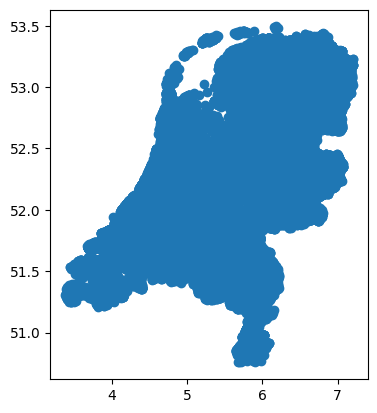

In [129]:
wells.plot()

<Axes: >

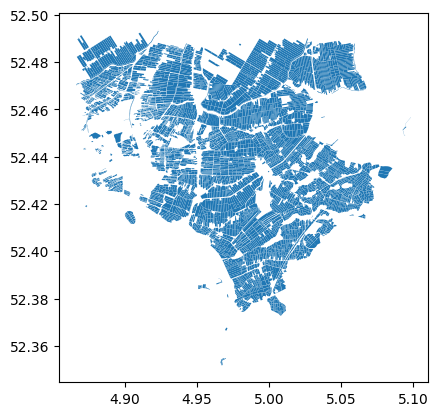

In [130]:
fields_crs.plot()

In [137]:
xmin, xmax = (4.9, 5.1)
ymin, ymax = (52.36, 52.5)

wells_bb = wells.cx[xmin:xmax, ymin:ymax]
fields_crs.cx[xmin:xmax, ymin:ymax]

# buffer wells
# dissolve


category                                         gewas  gewascode  \
938    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
939    Grasland                            Grasland, blijvend        265   
940    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
941    Grasland                            Grasland, blijvend        265   
942    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
938    2020  Definitief  POLYGON ((4.92110 52.44374, 4.92103 52.44440, ...  
939    2020  Definitief  POLYGON ((4.91567 52.44430, 4.91574 52.44426, ...  
940    2020  Definitief  POLYGON ((4.90325 52.44386, 4.90332 52.44387, ...  
941    2020  Definitief  POLYGON ((4.91610 52.44478, 4.91618 52.44481, ...  
942    2020  Definitief  POLYGON ((4.90393 52.44514, 4.90395 52.44515, ...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((5.06925 52.42106, 5.06938 52.42107, ...  
22027  2020  Definitief  POLYGON ((5.06999 52.42336, 5.07005 52.42337, ...  
22028  2020  Definitief  POLYGON ((5.07195 52.42203, 5.07243 52.42214, ...  
22029  2020  Definitief  POLYGON ((5.07019 52.42212, 5.07087 52.42225, ...  
22030  2020  Definitief  POLYGON ((5.06912 52.42022, 5.06921 52.42022, ...  

[4481 rows x 6 columns]

<Axes: >

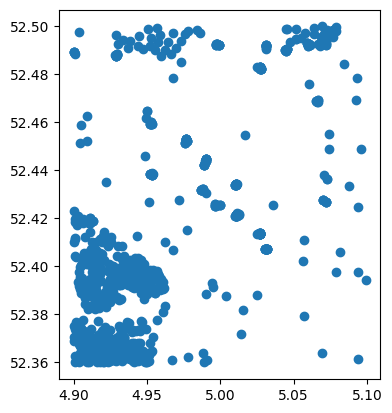

In [132]:
wells_bb.plot()

<Axes: >

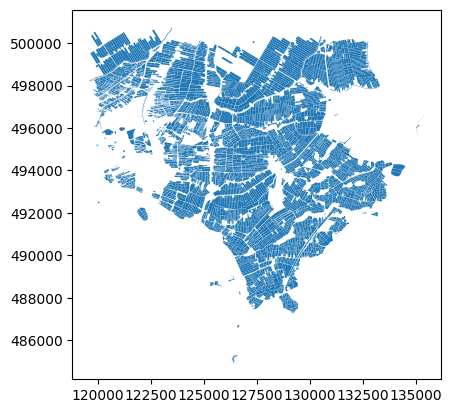

In [136]:
fields_crs.plot()